# Script para comparar las temperaturas máximas medidas y pronosticadas

In [1]:
from netCDF4 import Dataset
import wrf  #conda install -c conda-forge wrf-python (dentro de nuestro entorno)
import xarray
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt #Este paquete nos permite graficar

### Extraemos datos del pickle (estación), lo leemos como un dataframe de pandas

In [6]:
import datetime
from datetime import timedelta

df_aws = pd.read_pickle("/home/matias/Desktop/Documents/WRF/Datos EMAs/VILLA MARIA DEL RIO SECO_aws.pkl")
print(df_aws[9:33])
df_aws.index = pd.to_datetime(df_aws.index.values) + timedelta(hours=3)
#print(df_aws)

                                     Estacion  Temp
date                                               
2019-01-02 03:00:00  VILLA MARIA DEL RIO SECO  26.2
2019-01-02 06:00:00  VILLA MARIA DEL RIO SECO  27.4
2019-01-02 09:00:00  VILLA MARIA DEL RIO SECO  31.4
2019-01-02 12:00:00  VILLA MARIA DEL RIO SECO  37.0
2019-01-02 15:00:00  VILLA MARIA DEL RIO SECO  39.6
2019-01-02 18:00:00  VILLA MARIA DEL RIO SECO  39.4
2019-01-02 21:00:00  VILLA MARIA DEL RIO SECO  25.2
2019-01-03 00:00:00  VILLA MARIA DEL RIO SECO  22.4
2019-01-03 03:00:00  VILLA MARIA DEL RIO SECO  17.0
2019-01-03 06:00:00  VILLA MARIA DEL RIO SECO  16.5
2019-01-03 09:00:00  VILLA MARIA DEL RIO SECO  16.1
2019-01-03 12:00:00  VILLA MARIA DEL RIO SECO  21.6
2019-01-03 15:00:00  VILLA MARIA DEL RIO SECO  25.1
2019-01-03 18:00:00  VILLA MARIA DEL RIO SECO  25.4
2019-01-03 21:00:00  VILLA MARIA DEL RIO SECO  22.8
2019-01-04 00:00:00  VILLA MARIA DEL RIO SECO  19.7
2019-01-04 03:00:00  VILLA MARIA DEL RIO SECO  17.1
2019-01-04 0

### Selecciono el rango de tiempo de la aws

In [10]:
extract_df_aws = df_aws['2020-08-20 06:00':'2020-08-20 12:00'] 
extract_df_aws

,Estacion,Temp
2020-08-20 06:00:00,VILLA MARIA DEL RIO SECO,0.2
2020-08-20 09:00:00,VILLA MARIA DEL RIO SECO,-2.4
2020-08-20 12:00:00,VILLA MARIA DEL RIO SECO,-1.3


### Cargamos los pickles del wrfout a analizar

In [15]:
df_wrfout = pd.read_pickle("/home/matias/Desktop/Documents/WRF/test/wrfout_A_d01_2020-02-05_06:00_pic/wrfout_A_d01_2020-02-05_06:00_tc.p")
#df_wrfout = pd.read_pickle("/home/matias/Desktop/Documents/WRF/test/wrfout_A_d01_2020-02-05_06:00_pic/wrfout_A_d01_2020-02-05_06:00_wspd_wdir10.p")

print(type(df_wrfout))

<class 'xarray.core.dataarray.DataArray'>


In [16]:
df_wrf = pd.DataFrame()

for index, Temp in wrf.iterrows():
    try:
        a = aws.loc[index]
    except KeyError as error:
        print(f"Index Error: {error}")
        continue

        
    df_wrf = df_wrf.append({'date': index,
                          'WRF': float(Temp[0]),
                          'AWS': float(a['Temp'])},
                          ignore_index=True) 

AttributeError: module 'wrf' has no attribute 'iterrows'

### Extraemos la variable temperatura a 2m del wrfout

In [8]:
# temperatura_2m_wrf4k = wrf.getvar(out4, "T2", timeidx=wrf.ALL_TIMES)
# temperatura_2m_wrf4k

# Extraemos el valor para una coordenada en particular

In [9]:
#Usamos la siguiente herramienta, que nos permite ver a que punto de la grilla corresponde una latitud y longitud
lat = -29.903531
lon = -63.723470
(x, y) = wrf.ll_to_xy(out4, lat, lon)#<-----Lat Lon a x,y
#(x1, y1) = wrf.ll_to_xy(wrf10k_file, lat, lon)#<-----Lat Lon a x,y
print('Coordenada x wrf4k:',x)
print('Coordenada x wrf4k:',y)
print('------------------------------------------------------------------')
# print('Coordenada x wrf10k:',x1)
# print('Coordenada x wrf10k:',y1)

NameError: name 'out4' is not defined

### Extraemos los valores de la coordenada

In [154]:
T_2m_wrf4k_coord = temperatura_2m_wrf4k[:,y,x]

df_T2_wrf4k_coord = pd.DataFrame(T_2m_wrf4k_coord.to_pandas(), columns=['T2-WRF4km'])
df_T2_wrf4k_coord['T2-WRF4km_C'] = df_T2_wrf4k_coord['T2-WRF4km'] - 273.15

print(df_T2_wrf4k_coord['T2-WRF4km_C'])
print(extract_df_aws['Temp'])

Time
2020-08-20 06:00:00    1.171387
2020-08-20 07:00:00   -1.435577
2020-08-20 08:00:00   -0.341980
2020-08-20 09:00:00   -0.708252
2020-08-20 10:00:00   -0.949951
2020-08-20 11:00:00    0.051849
2020-08-20 12:00:00    4.458588
Name: T2-WRF4km_C, dtype: float32
2020-08-20 06:00:00    0.2
2020-08-20 09:00:00   -2.4
2020-08-20 12:00:00   -1.3
Name: Temp, dtype: float64


### Extraemos la T máxima del pronóstico y la ema

In [155]:
print('Maxima de wrf4km:', df_T2_wrf4k_coord['T2-WRF4km_C'].max())
print('Maxima de ema:', extract_df_aws['Temp'].max())

Maxima de wrf4km: 4.4585876
Maxima de ema: 0.2


### Meteogramas

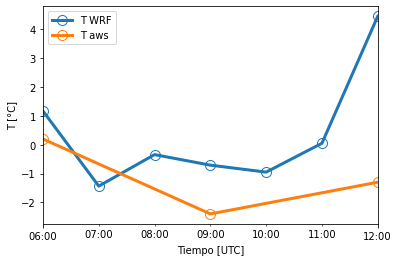

In [156]:
df_T2_wrf4k_coord['T2-WRF4km_C'].plot(label='T WRF', marker='o', markerfacecolor='none', ms=10, lw=3)
extract_df_aws['Temp'].plot(label='T aws', marker='o', markerfacecolor='none', ms=10, lw=3)
plt.ylabel('T [°C]')
plt.xlabel('Tiempo [UTC]')

plt.legend()
plt.show()

# Estadística sobre los datos del pronóstico y las emas

### Coeficiente de correlación de Pearson (r)

In [157]:
from scipy.stats.stats import pearsonr

r = pearsonr(df_T2_wrf4k_coord['T2-WRF4km_C'], extract_df_aws['Temp'])
print('Coeficiente de correlación de Pearson =', r[0])

ValueError: x and y must have the same length.

### RMSE (Root Mean Square Error)

In [158]:
N = extract_df_aws['Temp'].count()
RMSE = (((df_T2_wrf4k_coord['T2-WRF4km_C'] - extract_df_aws['Temp'])**2).sum()/N)**(.5)
print('RMSE =', RMSE)

RMSE = 3.510315052038858


### Scatter Plot

In [159]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')
 
# use the function regplot to make a scatterplot
sns.regplot(x=df_T2_wrf4k_coord['T2-WRF4km_C'], y=extract_df_aws['Temp'])
sns.plt.show()
 
# Without regression fit:
#sns.regplot(x=df_T2_wrf4k_coord['T2-WRF4km_C'], y=extract_df_aws['Temp'], fit_reg=False)
#sns.plt.show()


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 7 and the array at index 1 has size 3